# 
Задание: тип визуализации данных
Загрузите данные по ЕГЭ за последние годы
https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv
выберите данные за 2018-2019 учебный год.
Выберите тип диаграммы для отображения результатов по административному округу Москвы, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.
Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.
Сколько школьников в Строгино, написавших ЕГЭ на 220 баллов и выше? 188

         ID                                           EDU_NAME   global_id  \
0      8236  Государственное бюджетное общеобразовательное ...   797946035   
1      8237  Государственное казенное общеобразовательное у...   797949150   
2      8238  Государственное казенное общеобразовательное у...   797949275   
3      8239  Частное учреждение общеобразовательная организ...   797949425   
4      8240  Автономная некоммерческая организация средняя ...   797949570   
...     ...                                                ...         ...   
2181  10417  Государственное бюджетное профессиональное обр...  1011905753   
2182  10418  Государственное бюджетное общеобразовательное ...  1011905754   
2183  10419  Государственное бюджетное общеобразовательное ...  1011905755   
2184  10420  Государственное бюджетное общеобразовательное ...  1011905756   
2185  10421  Государственное бюджетное общеобразовательное ...  1011905757   

           YEAR                           AdmArea  \
0     2016

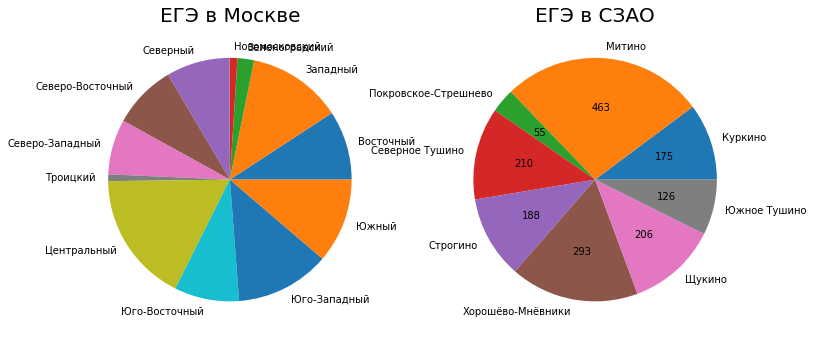

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
print(data)

data["District"] = data["District"].str.replace("район ","").astype("category")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category")
data = data.set_index("YEAR").loc["2018-2019"].reset_index()
print(data)

fig = plt.figure(figsize=(12,12))
area = fig.add_subplot(1, 2, 1)
area.set_title("ЕГЭ в Москве", fontsize=20)
data_adm = data.set_index("AdmArea")
data_adm["PASSES_OVER_220"].groupby("AdmArea").sum().plot.pie(ax=area, label="")

area = fig.add_subplot(1, 2, 2)
area.set_title("ЕГЭ в СЗАО", fontsize=20)
data_district = data_adm.loc["Северо-Западный"].reset_index().set_index("District")
data_district = data_district["PASSES_OVER_220"].groupby("District").sum()
total = sum(data_district)
data_district.plot.pie(ax=area, label="", autopct=lambda x:int(round(total * x/100)))
plt.show()